## Exercises: Explore the dataset

In [2]:
import pandas as pd
import seaborn as sns
taxis = sns.load_dataset("taxis")

In [3]:
# exploring the dataset:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

**Explore the "taxis" dataset to answer the following questions:**

**Q1:** How many rows and column are in the dataset?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;<b>Rows:</b> 6433
&nbsp;&nbsp;&nbsp;<b>Columns:</b> 14
</details>

In [4]:
rows, cols = taxis.shape
print(f'Number of rows = {rows}.\nNumber of cols = {cols}.')

Number of rows = 6433.
Number of cols = 14.


**Q2:** What datatype is the most common in the set?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;object (6 columns)
</details>

In [5]:
dt = {}

for item in taxis.dtypes:
    if not item in dt.keys():
        dt[item] = 1
    if item in dt.keys():
        dt[item] += 1

max_occur = max(dt.values())

for key, value in dt.items():
    if value == max_occur:
        print(f'Most frequent datatype: {key}.')



Most frequent datatype: object.


**Q3:** What is the average number of passengers in a taxi?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;1.54
</details>

In [6]:
print(f'Average nbr of passengers: {round(taxis["passengers"].mean(), 2)}')

Average nbr of passengers: 1.54


**Q4:** What is the most common number of passengers in a taxi?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;1
</details>

In [7]:
# Första steget skapar en serie med totalsumman för varje occurance, i form av en pd Series object.
# På denna series object, returnerar indexet för den vanligaste number av passengers.

nbr_pass_series = taxis['passengers'].value_counts()

# 1: använder series.idxmax() metoden
nbr_pass_series.idxmax()

# filtrerar typ:
nbr_pass_series[nbr_pass_series == nbr_pass_series.max()].index[0]
print(f'Most common nbr of passenger is : {nbr_pass_series[nbr_pass_series == nbr_pass_series.max()].index[0]}')


Most common nbr of passenger is : 1


<Axes: xlabel='passengers'>

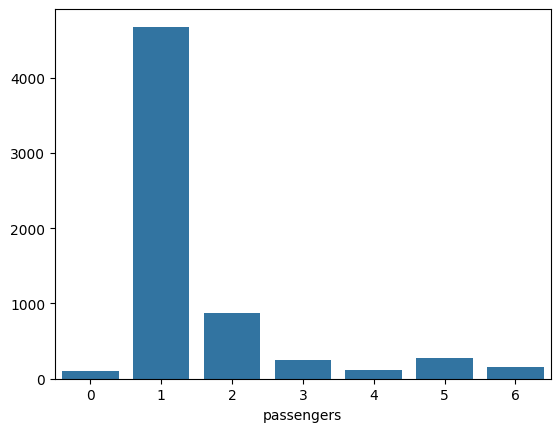

In [8]:
# sorterar serien och plottar ett histogram i Seaborn:
a = nbr_pass_series.sort_index()
sns.barplot(x=a.index, y=a.values)

**Q5:** What is the most common payment method?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;credit card
</details>

Most common payment method: "credit card"


<Axes: xlabel='payment'>

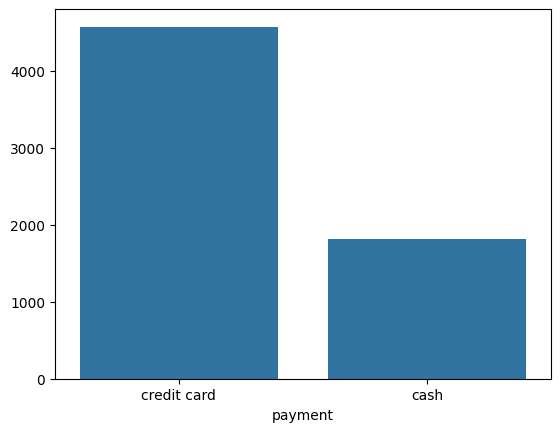

In [9]:
most_common_payment_seres = taxis['payment'].value_counts()
most_common_payment_seres
print(f'Most common payment method: "{most_common_payment_seres[most_common_payment_seres == most_common_payment_seres.max()].index[0]}"')
sns.barplot(x=most_common_payment_seres.index, y=most_common_payment_seres.values)

**Q6:** Which of the categorical features has the most categories?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;dropoff_zone (203 categories)
</details>

Fråga Fredrik om man ska loopa igenom, eller om man ka göra på något annat sätt.

In [10]:
# skapa en tom dict, loopa igenom alla cols, sätt längden av unique som value, om col.dtypes == 'o'
# taxis.columns # returnerar en lista med alla kolumner
# taxis['color'].dtypes # returnerar datatypen för kolumnen 'colors'

mydict = {}

for item in taxis.columns:
    if taxis[(item)].dtypes == 'O':
        mydict[item] = len(taxis[(item)].unique())

max(mydict.values())

for key, value in mydict.items():
    if value == max(mydict.values()):
        print(key)


dropoff_zone


**Q7:** What percentage of cars in the set are yellow?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;84.7%
</details>

In [11]:
my_series = taxis['color'].value_counts()
yellow = my_series['yellow'] / ( my_series['yellow'] + my_series['green'])
print(f'Percentage of yellow taxis: {yellow:.1%}')

Percentage of yellow taxis: 84.7%


**Q8:** Which dropoff borough is most common? Which one is least common?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;<b>Most common:</b> Manhattan (5206)<br>
&nbsp;&nbsp;&nbsp;<b>Least common:</b> Staten Island (2)<br>
</details>

In [18]:
# most common drop off borough:
most_common = taxis['dropoff_borough'].value_counts().idxmax()
print(f'Most common drop off borough: {most_common}')

#least common drop off borough
least_common = taxis['dropoff_borough'].value_counts().idxmin()
print(f'Least common drop off borough: {least_common}')


Most common drop off borough: Manhattan
Least common drop off borough: Staten Island


**Q9:** Which column has the most missing values? How many?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;<i>dropoff_zone</i> and <i>dropoff_borough</i> both have 45 missing values.
</details>

In [34]:
data = taxis.isna().sum() # returnerar en serie ('data') med antal NaN's per col
max_value = data.max() # kvantifierar max ur serien ovan

indices = data.index[data == max_value]

print(type(indices))

print(f'Cols with most missing values: {indices}.')


<class 'pandas.core.indexes.base.Index'>
Cols with most missing values: Index(['dropoff_zone', 'dropoff_borough'], dtype='object').


### Memory usage
``` taxis.info(memory_usage="deep") ``` gives you the total memory usage of the dataframe.

``` taxis.memory_usage(deep=True) ``` give you the total memory usage for each column.

**Answer the following questions:**

**Q10:** What is the total memory usage of the dataframe?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;2.9 MB
</details>

In [35]:
taxis.info(memory_usage="deep") # ger 2.9 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

**Q11:** Which column takes up the most memory? How many kilobytes?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;pickup_zone (470 KB)
</details>

In [37]:
taxis.memory_usage(deep=True).idxmax()

'pickup_zone'

**Q12:** Why does the numeric columns all take up exactly 51464 bytes?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;They all use 64 bit datatypes. 64 bits = 8 bytes. 6433 entries * 8 bytes = 51464 bytes.
</details>

För att datan sparas i 'float64'. Dvs, 8bytes per sparad data = 6433 * 8 bytes = 51464 bytes.

In [38]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

**Q13:** What is the total memory usage after converting all *object* columns to *category*?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;494.0 KB
</details>

In [59]:
taxis['color'] = taxis['color'].astype('category') # ändrar till dtype category på en manuellt

for item in taxis.columns:
    if taxis[item].dtypes == 'object':
       taxis[item] = taxis[item].astype('category')

print(taxis.info())

taxis.info(memory_usage="deep") # ger 494 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   category      
 9   payment          6389 non-null   category      
 10  pickup_zone      6407 non-null   category      
 11  dropoff_zone     6388 non-null   category      
 12  pickup_borough   6407 non-null   category      
 13  dropoff_borough  6388 non-null   category      
dtypes: category(6), datetime64[ns](2), float

**Q14:** ... and after also converting *float64* to *float32*?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;368.4 KB
</details>

In [61]:
for item in taxis.columns:
    if taxis[item].dtypes == 'float64':
        taxis[item] = taxis[item].astype('float32')
        
print(taxis.info())

taxis.info(memory_usage="deep") # ger 368.4 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float32       
 4   fare             6433 non-null   float32       
 5   tip              6433 non-null   float32       
 6   tolls            6433 non-null   float32       
 7   total            6433 non-null   float32       
 8   color            6433 non-null   category      
 9   payment          6389 non-null   category      
 10  pickup_zone      6407 non-null   category      
 11  dropoff_zone     6388 non-null   category      
 12  pickup_borough   6407 non-null   category      
 13  dropoff_borough  6388 non-null   category      
dtypes: category(6), datetime64[ns](2), float

**Q15:** What is the smallest datatype we can convert passengers to? What is the total memory usage after converting passengers to the new type?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;The maximum number of passengers in the dataset are 6,<br> 
&nbsp;&nbsp;&nbsp;and therefore the values easily fit into the <i>int8</i> type (8 bit integer).<br>
<br>
&nbsp;&nbsp;&nbsp;New size: 324.4 KB
</details>

In [65]:
taxis['passengers'] = taxis['passengers'].astype('int8')
taxis.info(memory_usage="deep") # ger 324.4 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int8          
 3   distance         6433 non-null   float32       
 4   fare             6433 non-null   float32       
 5   tip              6433 non-null   float32       
 6   tolls            6433 non-null   float32       
 7   total            6433 non-null   float32       
 8   color            6433 non-null   category      
 9   payment          6389 non-null   category      
 10  pickup_zone      6407 non-null   category      
 11  dropoff_zone     6388 non-null   category      
 12  pickup_borough   6407 non-null   category      
 13  dropoff_borough  6388 non-null   category      
dtypes: category(6), datetime64[ns](2), float

**Q16:** How many percent of the orignal datasize is the new dataset after converting all the types as above?

<details>
<summary>Answer</summary>
<br>
&nbsp;&nbsp;&nbsp;11.0 %
</details>

In [67]:
save = 324.4 / 2900
print(f'{save:2%}')

11.186207%


### Final note:
Just to be clear, if we want to limit our memory usage by specifying datatypes with a smaller memory footprint, it makes more sense to do so when loading the dataset in to pandas, than changing the type afterwards (as in the example above).

Most common ways to load data into pandas (like pd.from_csv, pd.from_json etc) provides optional parameters for setting the datatype as the files are read into pandas dataframes.

Also, note that this is really only a concern when working with huge sets of data. For smaller datasets, like the one in the example above, it doesn't really matter, and might be only unneccessary work to optimize. The above exercises just serve as examples to better understand data types and their memory footprints.